In [37]:
import numpy as np
import math

def draw_sample(d, v):
    N = 2
    mp = -69
    rssi_mean = -(10 * N) * math.log10(d) + mp
    return np.random.normal(rssi_mean, math.sqrt(v))

def rssi_sampling(variances):
    sample_num = 10000
    rssi = {}
    dists = [1, 2, 3, 4, 5, 6, 7]
    for d in range(len(dists)):
        print("sampling for: " + str(dists[d]))
        rssi[d] = []
        for i in range(sample_num):
            rssi[d].append(draw_sample(dists[d], variances[d]))
            
    return rssi

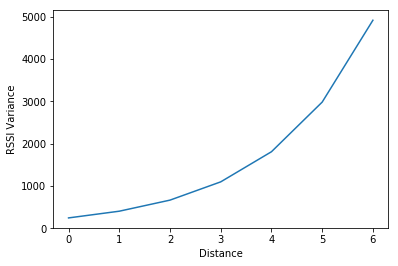

sampling for: 1
sampling for: 2
sampling for: 3
sampling for: 4
sampling for: 5
sampling for: 6
sampling for: 7


In [38]:
dists = [1, 2, 3, 4, 5, 6, 7]
variances = []

for i in range(len(dists)):
    variances.append(math.exp((dists[i]/2) + 5))
    
plt.plot(variances)
plt.xlabel('Distance')
plt.ylabel('RSSI Variance')
plt.show()

rssi_dict = rssi_sampling(variances)

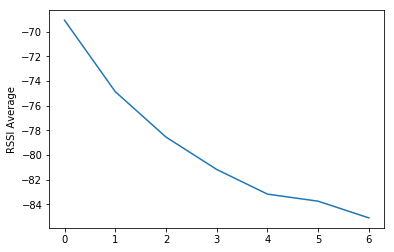

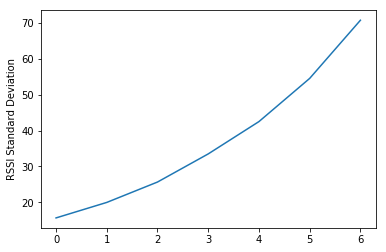

In [45]:
import matplotlib.pyplot as plt

dists = [1, 2, 3, 4, 5, 6, 7]
means = []
stds = []

for d in range(len(dists)):
    # xdata.append(sum(rssi_dict[d]) / float(len(rssi_dict[d])))
    means.append(np.mean(rssi_dict[d]))
    stds.append(np.std(rssi_dict[d]))
    
plt.plot(means)
plt.ylabel('Distance')
plt.ylabel('RSSI Average')
plt.show()

plt.plot(stds)
plt.ylabel('Distance')
plt.ylabel('RSSI Standard Deviation')
plt.show()



In [60]:
import pickle

with open('SensorModel.pickle', 'wb') as handle:
    pickle.dump(means, handle)
    pickle.dump(stds, handle)

# with open('SensorModel.pickle', 'rb') as handle:
#    a, b = pickle.load(handle)

f = open('SensorModel.pickle', 'rb')
a, b = pickle.load(f)
    
print (a == means)
print (b == stds)

ValueError: too many values to unpack (expected 2)